# Task 2: Customer Segmentation 
## *Description:*
1. Dataset (Recommended): [Mall Customer (Kaggle)](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python).
2. Cluster customers into segments based on income and spending score.
3. Perform scaling and visual exploration of groupings.
4. Apply K-Means clustering and determine optimal number of clusters.
5. Visualize clusters using 2D plots.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [3]:
data.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [4]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
ssd = []
k_values = range(1, 15)
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)

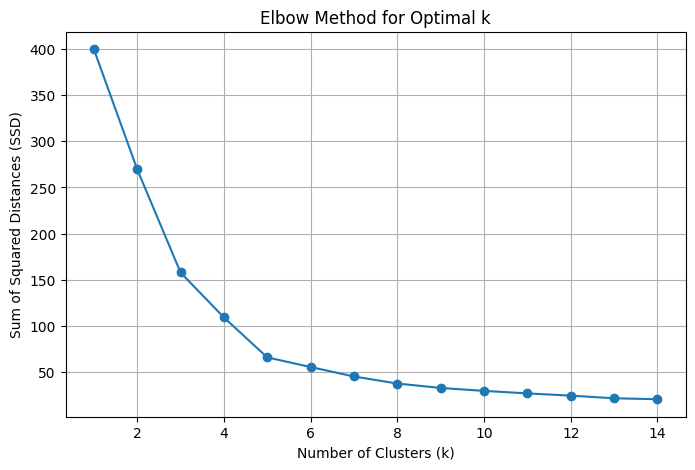

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, ssd, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

In [7]:
kmeans = KMeans(n_clusters=5)
data['cluster'] = kmeans.fit_predict(X_scaled)

In [8]:
average_spending = data.groupby('cluster')['Spending Score (1-100)'].mean().reset_index()
average_spending.columns = ['cluster', 'average_spending']

print(average_spending)

   cluster  average_spending
0        0         49.518519
1        1         20.913043
2        2         17.114286
3        3         79.363636
4        4         82.128205


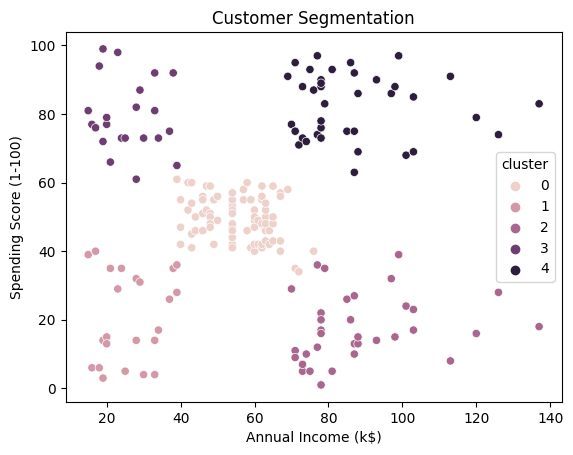

In [9]:
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster')
plt.title('Customer Segmentation')
plt.show()

## DBSCAN

In [10]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

In [11]:
average_spending = data.groupby('dbscan_cluster')['Spending Score (1-100)'].mean().reset_index()

average_spending.columns = ['cluster', 'average_spending']

print(average_spending)

   cluster  average_spending
0       -1         46.875000
1        0         43.101911
2        1         82.800000


##  Plot DBSCAN clusters

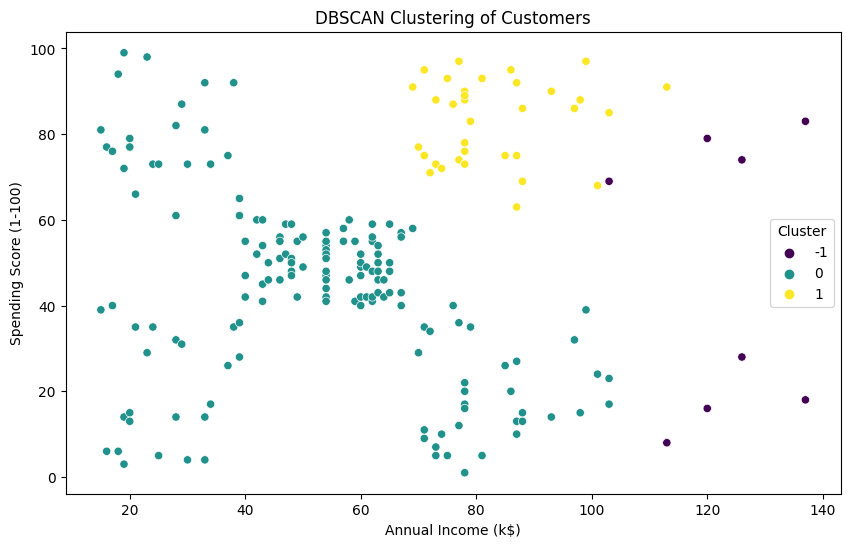

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='dbscan_cluster', palette='viridis')
plt.title('DBSCAN Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()